<a href="https://colab.research.google.com/github/VladousSparrowous/server_with_model/blob/main/Tea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

seed = 20

In [ ]:
df = pd.read_excel('/content/sample_data/df.xlsx')
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      14081 non-null  int64         
 1   Promo_start     14081 non-null  datetime64[ns]
 2   Promo_end       14081 non-null  datetime64[ns]
 3   Shipping_start  14081 non-null  datetime64[ns]
 4   Shipping_end    14081 non-null  datetime64[ns]
 5   Promo_type      14081 non-null  object        
 6   Feat_2          14081 non-null  float64       
 7   Feat_3          14081 non-null  float64       
 8   Agent           14081 non-null  object        
 9   Promo_id        14081 non-null  object        
 10  Item_id         14081 non-null  object        
 11  Feat_7          6668 non-null   float64       
 12  Promo_class     14081 non-null  object        
 13  Feat_9          5881 non-null   float64       
 14  Feat_10         6639 non-null   float64       
 15  Fe

,Unnamed: 0,Promo_start,Promo_end,Shipping_start,Shipping_end,Promo_type,Feat_2,Feat_3,Agent,Promo_id,Item_id,Feat_7,Promo_class,Feat_9,Feat_10,Feat_11,Feat_12,Target
9504,9504,2023-11-15,2023-11-21,2023-10-17,2023-11-18,J,14398.576770,58.220755,C,Promo №4941.0,Item ID: 22.0,86985.198969,D,2.297701e+07,2.608648e+07,2.418338,75775,8549
43,43,2020-01-20,2020-01-26,2020-01-06,2020-01-29,L,3577.093926,58.200000,B,Promo №71.0,Item ID: 60.0,NaN,D,NaN,NaN,NaN,85792,3344
2324,2324,2021-03-24,2021-03-30,2021-03-07,2021-03-20,A,23555.250077,68.598113,C,Promo №1538.0,Item ID: 90.0,NaN,D,NaN,NaN,NaN,8619,14501
8055,8055,2023-07-19,2023-07-25,2023-06-20,2023-07-16,J,43854.088564,73.516981,C,Promo №4639.0,Item ID: 147.0,1007.750304,D,2.912773e+07,1.219098e+05,51.209169,24396,20
2545,2545,2021-05-05,2021-05-11,2021-04-11,2021-05-01,A,2949.422302,47.864151,C,Promo №1699.0,Item ID: 8.0,NaN,D,NaN,NaN,NaN,9962,4327


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Promo_start,0
Promo_end,0
Shipping_start,0
Shipping_end,0
Promo_type,0
Feat_2,0
Feat_3,0
Agent,0
Promo_id,0


In [ ]:
data = df.copy()

problem_columns = ['Feat_7', 'Feat_9', 'Feat_10', 'Feat_11']
mask = data[problem_columns].isna().all(axis=1)
problem_rows = data[mask]
problem_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7413 entries, 0 to 14080
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7413 non-null   int64         
 1   Promo_start     7413 non-null   datetime64[ns]
 2   Promo_end       7413 non-null   datetime64[ns]
 3   Shipping_start  7413 non-null   datetime64[ns]
 4   Shipping_end    7413 non-null   datetime64[ns]
 5   Promo_type      7413 non-null   object        
 6   Feat_2          7413 non-null   float64       
 7   Feat_3          7413 non-null   float64       
 8   Agent           7413 non-null   object        
 9   Promo_id        7413 non-null   object        
 10  Item_id         7413 non-null   object        
 11  Feat_7          0 non-null      float64       
 12  Promo_class     7413 non-null   object        
 13  Feat_9          0 non-null      float64       
 14  Feat_10         0 non-null      float64       
 15  Feat_11 

<BarContainer object of 11 artists>

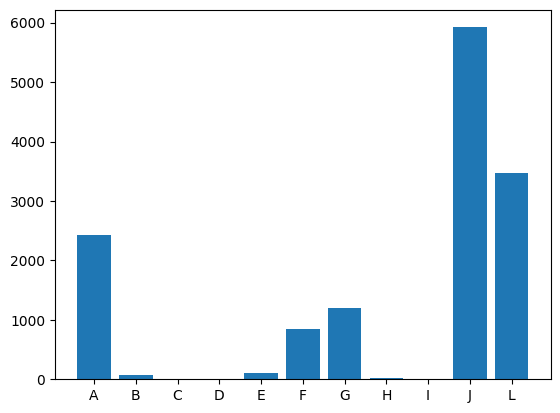

In [ ]:
# @title категориальные признаки

data_Promo_type = data.groupby('Promo_type')['Target'].count()
plt.bar(data_Promo_type.index, np.array(data_Promo_type))

<BarContainer object of 3 artists>

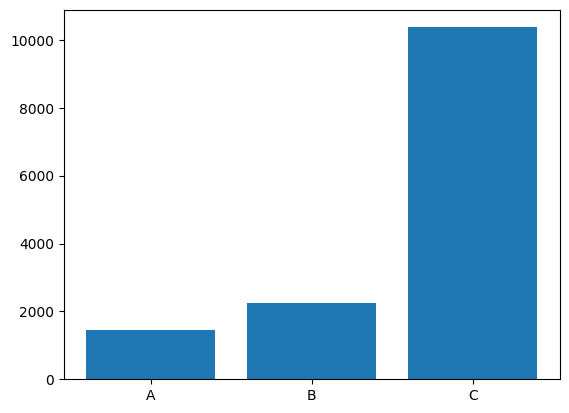

In [ ]:
data_Agent = data.groupby('Agent')['Target'].count()
plt.bar(data_Agent.index, np.array(data_Agent))

<BarContainer object of 3 artists>

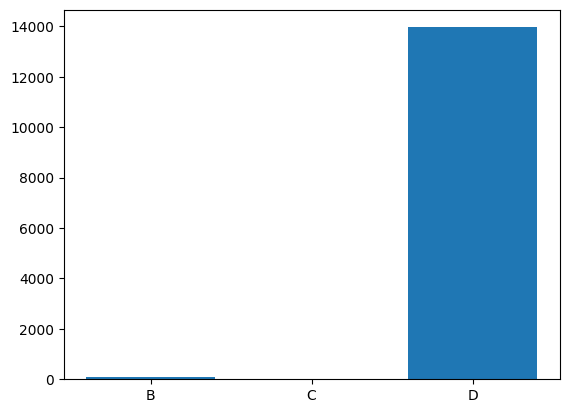

In [ ]:
data_Promo_class = data.groupby('Promo_class')['Target'].count()
plt.bar(data_Promo_class.index, np.array(data_Promo_class))

(array([2779.,  932.,  451.,  615.,  151.,  190.,  375.,  297.,  656.,
         222.]),
 array([1.00000e+00, 1.00009e+04, 2.00008e+04, 3.00007e+04, 4.00006e+04,
        5.00005e+04, 6.00004e+04, 7.00003e+04, 8.00002e+04, 9.00001e+04,
        1.00000e+05]),
 <BarContainer object of 10 artists>)

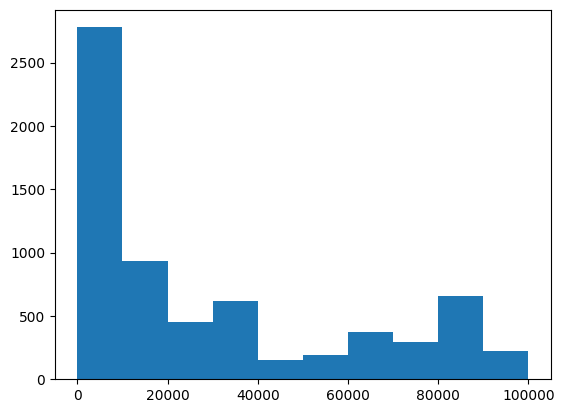

In [ ]:
# @title признаки с пропусками

plt.hist(data['Feat_7'])

(array([1611.,  799., 1302.,  740.,   60.,   23.,  128.,  428.,  489.,
         301.]),
 array([1.00000000e+00, 1.00000009e+07, 2.00000008e+07, 3.00000007e+07,
        4.00000006e+07, 5.00000005e+07, 6.00000004e+07, 7.00000003e+07,
        8.00000002e+07, 9.00000001e+07, 1.00000000e+08]),
 <BarContainer object of 10 artists>)

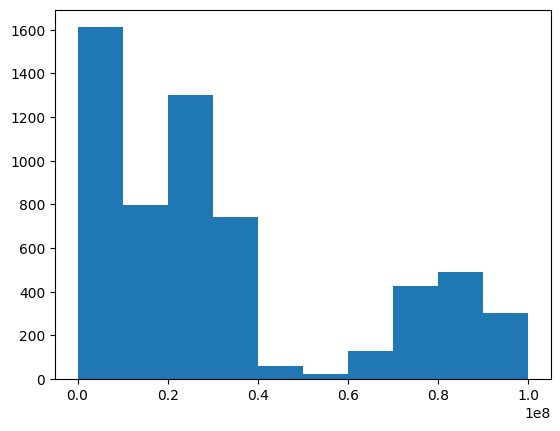

In [ ]:
plt.hist(data['Feat_9'])

(array([4.949e+03, 7.820e+02, 4.150e+02, 2.310e+02, 1.060e+02, 6.000e+01,
        3.500e+01, 3.400e+01, 2.400e+01, 3.000e+00]),
 array([1.00000000e+00, 1.00000009e+07, 2.00000008e+07, 3.00000007e+07,
        4.00000006e+07, 5.00000005e+07, 6.00000004e+07, 7.00000003e+07,
        8.00000002e+07, 9.00000001e+07, 1.00000000e+08]),
 <BarContainer object of 10 artists>)

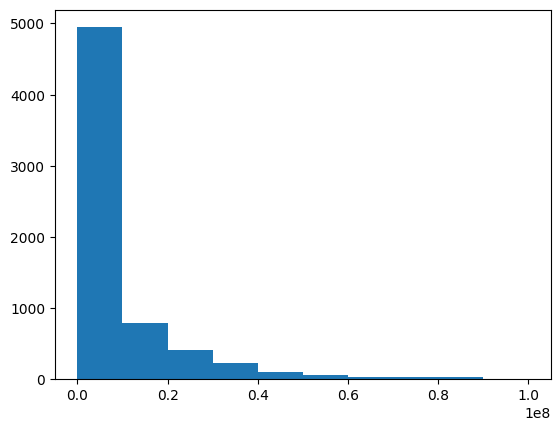

In [ ]:
plt.hist(data['Feat_10'])

(array([2.027e+03, 1.414e+03, 8.820e+02, 6.680e+02, 7.300e+02, 5.790e+02,
        2.660e+02, 5.400e+01, 1.700e+01, 2.000e+00]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

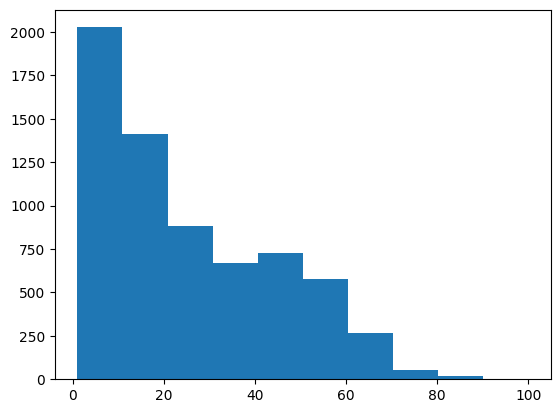

In [ ]:
plt.hist(data['Feat_11'])

In [ ]:
'''
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
data_f = pd.DataFrame(imputer.fit_transform(data[problem_columns]), columns=problem_columns)
data_f.info()
data[problem_columns] = data_f[problem_columns]
'''

'\nfrom sklearn.impute import KNNImputer\n\nimputer = KNNImputer(n_neighbors=3)\ndata_f = pd.DataFrame(imputer.fit_transform(data[problem_columns]), columns=problem_columns)\ndata_f.info()\ndata[problem_columns] = data_f[problem_columns]\n'

In [ ]:

for i in problem_columns:
  m = data[i].mode()
  m = np.array(m).mean()
  data[i] = data[i].fillna(m)
data.info()
data.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14081 entries, 0 to 14080
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      14081 non-null  int64         
 1   Promo_start     14081 non-null  datetime64[ns]
 2   Promo_end       14081 non-null  datetime64[ns]
 3   Shipping_start  14081 non-null  datetime64[ns]
 4   Shipping_end    14081 non-null  datetime64[ns]
 5   Promo_type      14081 non-null  object        
 6   Feat_2          14081 non-null  float64       
 7   Feat_3          14081 non-null  float64       
 8   Agent           14081 non-null  object        
 9   Promo_id        14081 non-null  object        
 10  Item_id         14081 non-null  object        
 11  Feat_7          14081 non-null  float64       
 12  Promo_class     14081 non-null  object        
 13  Feat_9          14081 non-null  float64       
 14  Feat_10         14081 non-null  float64       
 15  Fe

,Unnamed: 0,Promo_start,Promo_end,Shipping_start,Shipping_end,Promo_type,Feat_2,Feat_3,Agent,Promo_id,Item_id,Feat_7,Promo_class,Feat_9,Feat_10,Feat_11,Feat_12,Target
1012,1012,2020-08-06,2020-08-26,2020-07-17,2020-08-27,L,2882.723910,37.486792,B,Promo №789.0,Item ID: 8.0,1.000000,D,9.938127e+07,2.263735e+07,1.851003,60352,3966
3122,3122,2021-08-18,2021-08-24,2021-07-21,2021-08-16,A,16443.699655,78.975472,C,Promo №2159.0,Item ID: 130.0,1.000000,D,9.938127e+07,2.263735e+07,1.851003,53649,1809
10624,10624,2024-02-07,2024-02-29,2024-02-01,2024-02-29,A,3578.860771,43.713208,A,Promo №5252.0,Item ID: 3.0,1.000000,D,9.938127e+07,2.263735e+07,1.851003,72568,14126
11089,11089,2024-03-20,2024-03-26,2024-02-20,2024-03-26,F,9621.470074,58.220755,C,Promo №5247.0,Item ID: 145.0,2126.361753,D,8.663882e+07,8.196456e+05,52.060172,17990,152
9994,9994,2023-12-14,2023-12-31,2023-12-01,2023-12-31,A,9773.860440,54.069811,A,Promo №5091.0,Item ID: 37.0,1.000000,D,9.938127e+07,2.263735e+07,1.851003,14461,4286
6605,6605,2023-03-13,2023-03-19,2023-02-28,2023-03-20,L,28314.688325,78.975472,B,Promo №4311.0,Item ID: 63.0,9523.787899,D,1.438436e+06,1.827415e+06,12.063037,64554,5034
2236,2236,2021-03-10,2021-03-16,2021-02-09,2021-03-06,A,7677.940766,47.843396,C,Promo №1500.0,Item ID: 37.0,1.000000,D,9.938127e+07,2.263735e+07,1.851003,84673,9387
2860,2860,2021-07-07,2021-07-13,2021-06-27,2021-06-29,F,31404.458214,68.598113,C,Promo №2055.0,Item ID: 50.0,1.000000,D,9.938127e+07,2.263735e+07,1.851003,34779,36
1613,1613,2020-11-11,2020-11-17,2020-10-14,2020-11-08,L,33049.832457,58.220755,C,Promo №1013.0,Item ID: 84.0,1.000000,D,9.938127e+07,2.263735e+07,1.851003,48293,101
7507,7507,2023-06-07,2023-06-13,2023-05-09,2023-06-10,J,7128.010314,58.200000,C,Promo №4515.0,Item ID: 66.0,900.752687,D,2.981453e+07,4.113018e+05,58.300860,12706,70


In [ ]:
'''
data[problem_columns] = data[problem_columns].fillna(data[problem_columns].mean())
data.info()
'''

'\ndata[problem_columns] = data[problem_columns].fillna(data[problem_columns].mean())\ndata.info()\n'

(14081,)


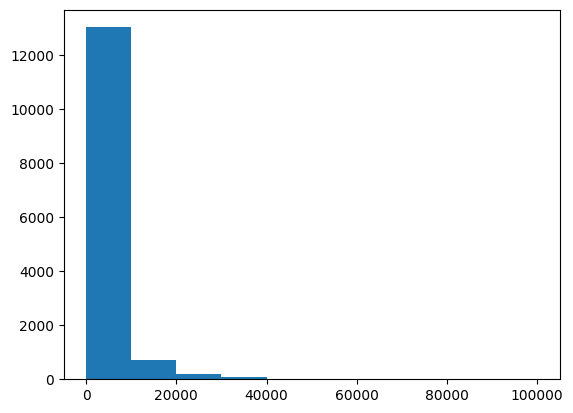

In [ ]:
# @title таргет

plt.hist(data['Target'])
print(np.shape(data['Target']))

(14081,)


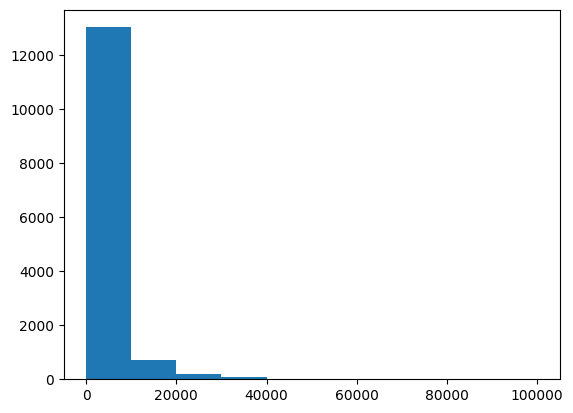

In [ ]:
data = data.dropna(axis=0)
plt.hist(data['Target'])
print(np.shape(data['Target']))

(13022,)


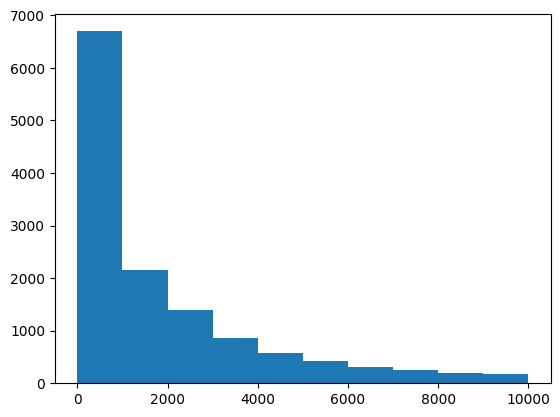

In [ ]:
targ = data['Target'].copy()
targ = targ[targ < 10000]
plt.hist(targ)
print(np.shape(targ))

In [ ]:
data = data[data['Target'] < 10000]

<ipython-input-19-7bdbf75efc2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Promo_time'] = (data['Promo_end'] - data['Promo_start']).dt.days


,Promo_time
0,6
2,6
3,6
4,6
5,6


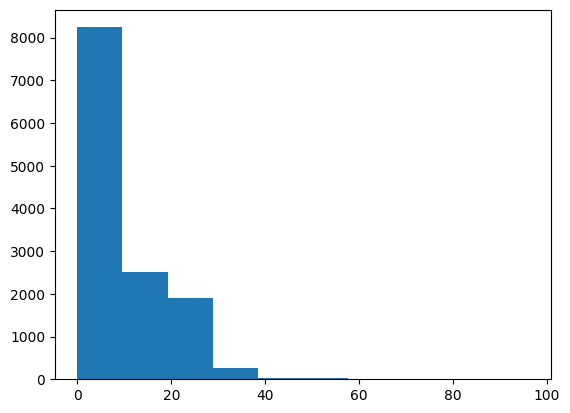

In [ ]:
# @title длительность акции

data['Promo_time'] = (data['Promo_end'] - data['Promo_start']).dt.days
plt.hist(data['Promo_time'])
data['Promo_time'].head()

<ipython-input-20-7875692bd99b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shipping_time'] = (data['Shipping_end'] - data['Shipping_start']).dt.days.astype(int)


(array([2.950e+02, 9.210e+02, 5.283e+03, 4.592e+03, 1.295e+03, 5.490e+02,
        6.200e+01, 1.500e+01, 6.000e+00, 4.000e+00]),
 array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ]),
 <BarContainer object of 10 artists>)

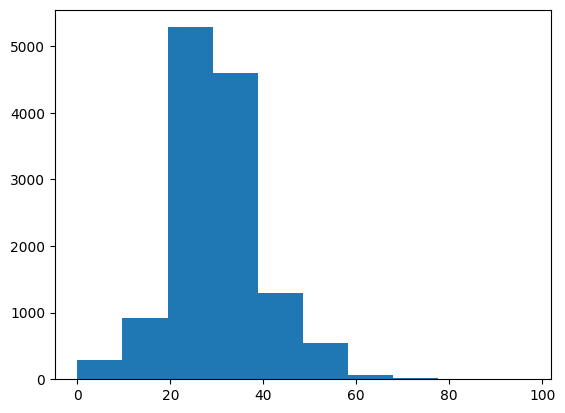

In [ ]:
# @title длительность отгрузки

data['Shipping_time'] = (data['Shipping_end'] - data['Shipping_start']).dt.days.astype(int)
plt.hist(data['Shipping_time'])

In [ ]:
data['Item_id'] = data['Item_id'].str.replace('Item ID: ', '')
print(data['Item_id'])

0         22.0
2         71.0
3         31.0
4         23.0
5        108.0
         ...  
14076     24.0
14077     26.0
14078     27.0
14079     48.0
14080     44.0
Name: Item_id, Length: 13022, dtype: object


In [ ]:
# @title train_test_split

from sklearn.model_selection import train_test_split


test_size = 0.2

data_train, data_test, Y_train, Y_test = train_test_split(
    data[data.columns.drop("Target")],
    np.array(data["Target"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (10417, 19) (10417,)
Test : (2605, 19) (2605,)


In [ ]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]

continuous_columns.remove('Target')
continuous_columns.remove('Unnamed: 0')
continuous_columns.remove('Shipping_time')

categorical_columns.remove('Promo_id')
#categorical_columns.remove('Item_id')

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")
print(continuous_columns)
print(categorical_columns)

Continuous : 8, Categorical : 4
['Feat_2', 'Feat_3', 'Feat_7', 'Feat_9', 'Feat_10', 'Feat_11', 'Feat_12', 'Promo_time']
['Promo_type', 'Agent', 'Item_id', 'Promo_class']


In [ ]:
# @title Preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

class DataPreprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, continuous_columns=None, categorical_columns=None):
        self.continuous_columns = continuous_columns
        self.categorical_columns = categorical_columns
        self.preprocessor = None

    def fit(self, data, y=None):
        transformers = []

        if self.continuous_columns is not None:
            transformers.append(('scaler', StandardScaler(), self.continuous_columns))

        if self.categorical_columns is not None:
            transformers.append(('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), self.categorical_columns))

        self.preprocessor = ColumnTransformer(transformers, remainder='drop')

        self.preprocessor.fit(data)
        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        if self.preprocessor is None:
            raise ValueError("Preprocessor has not been fitted. Please call fit before transform.")
        return self.preprocessor.transform(data)


In [ ]:
DP = DataPreprocessor(continuous_columns=continuous_columns, categorical_columns=categorical_columns)

X_train = DP.fit_transform(data_train)
X_test = DP.transform(data_test)

In [ ]:
# @title Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


Regression = Ridge()
Regression.fit(X_train, Y_train)
answer_L2 = Regression.predict(X_test)
print('MAE (Ridge):', mean_absolute_error(Y_test, answer_L2))
print('MAPE (Ridge):', mean_absolute_percentage_error(Y_test, answer_L2))

MAE (Ridge): 1150.9403648634886
MAPE (Ridge): 6.593030408436406


In [ ]:
# @title GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


param = {'alpha': np.logspace(-3, 3, num=7, base=10.)}
print(param)

regressor = Ridge()

rgr = GridSearchCV(regressor, param_grid=param, scoring=make_scorer(mean_absolute_error, greater_is_better=False), cv=5)
result = rgr.fit(X_train, Y_train).cv_results_
# print(result, '\n')

number = list(result['rank_test_score']).index(1)
best_par = rgr.best_params_['alpha']
print('best_parametr: ', best_par)

{'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}
best_parametr:  0.001


In [ ]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30504 stored elements and shape (2605, 183)>
  Coords	Values
  (0, 0)	-1.1181408523127405
  (0, 1)	0.5753871619683235
  (0, 2)	-0.5293106315892564
  (0, 3)	0.7490940534052206
  (0, 4)	0.7141970989053026
  (0, 5)	-0.6552588211351718
  (0, 6)	-0.6996178164517983
  (0, 7)	-0.621866137614477
  (0, 17)	1.0
  (0, 19)	1.0
  (0, 139)	1.0
  (0, 182)	1.0
  (1, 0)	-0.030106174119810352
  (1, 1)	0.9508132955152343
  (1, 2)	1.7974747816732652
  (1, 3)	-1.3001496473327805
  (1, 4)	-0.5232454129798176
  (1, 5)	0.3993935279305836
  (1, 6)	0.048320800858006746
  (1, 7)	-0.621866137614477
  (1, 16)	1.0
  (1, 19)	1.0
  (1, 23)	1.0
  (1, 182)	1.0
  (2, 0)	-0.9455627547108199
  :	:
  (2602, 17)	1.0
  (2602, 94)	1.0
  (2602, 181)	1.0
  (2603, 0)	1.0950585218488762
  (2603, 1)	1.8940950380954098
  (2603, 2)	-0.5293106315892564
  (2603, 3)	0.7490940534052206
  (2603, 4)	0.7141970989053026
  (2603, 5)	-0.6552588211351718
  (2603, 6)	-1.7138172918035

In [ ]:
# @title CV Ridge с оптимальным гиперпараметром

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from scipy.sparse import vstack


regressor = Ridge(best_par)
cv=KFold(n_splits=5, shuffle=True, random_state=42)

X_cv = vstack([X_train, X_test])
Y_cv = np.concatenate([Y_train, Y_test])
print('MAE (по CV Ridge):', cross_val_score(regressor, X_cv, Y_cv, scoring=make_scorer(mean_absolute_error), cv=cv).mean())


MAE (по CV Ridge): 1135.8451612055774


In [ ]:
# @title Lasso

from sklearn.linear_model import Lasso

Regression = Lasso()
Regression.fit(X_train, Y_train)
answer_L1 = Regression.predict(X_test)
print('MAE (Lasso):', mean_absolute_error(Y_test, answer_L1))
print('MAPE (Lasso):', mean_absolute_percentage_error(Y_test, answer_L1))

MAE (Lasso): 1168.1254837174215
MAPE (Lasso): 6.751701486508513


In [ ]:
# @title lightgbm

import lightgbm as lgb

model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, Y_train)

answer_lgb = model_lgb.predict(X_test)

print('MAE (LightGBM):', mean_absolute_error(Y_test, answer_lgb))
print('MAPE (LightGBM):', mean_absolute_percentage_error(Y_test, answer_lgb))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2002
[LightGBM] [Info] Number of data points in the train set: 10417, number of used features: 172
[LightGBM] [Info] Start training from score 1818.699818
MAE (LightGBM): 986.9466815099914
MAPE (LightGBM): 4.787251580604839


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# @title RandomForest

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)

answer_rf = model_rf.predict(X_test)
print('MAE (rf):', mean_absolute_error(Y_test, answer_rf))
print('MAPE (rf):', mean_absolute_percentage_error(Y_test, answer_rf))

MAE (rf): 930.6966218809981
MAPE (rf): 3.844199993127072


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.9 MB/s eta 0:00:00


In [ ]:
# @title подбор гиперпараметров(optuna)
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    model = RandomForestRegressor(**params)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_absolute_error(Y_test, y_pred))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
print('Best parameters: ', best_params)

[I 2025-04-21 15:00:16,063] A new study created in memory with name: no-name-9256b186-811f-411a-a7cd-49b34bdce300
[I 2025-04-21 15:00:24,482] Trial 0 finished with value: 34.47124547580821 and parameters: {'n_estimators': 321, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 34.47124547580821.
[I 2025-04-21 15:00:30,032] Trial 1 finished with value: 37.61719825519999 and parameters: {'n_estimators': 210, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 34.47124547580821.
[I 2025-04-21 15:00:39,681] Trial 2 finished with value: 34.28974093272158 and parameters: {'n_estimators': 160, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 34.28974093272158.
[I 2025-04-21 15:01:22,455] Trial 3 finished with value: 34.474261101278984 and par

Best parameters:  {'n_estimators': 156, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}


In [ ]:
# @title Модель с лучшими параметрами
best_params = {'n_estimators': 156, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}
model_tuned = RandomForestRegressor(**best_params)
model_tuned.fit(X_train, Y_train)
y_pred_opt = model_tuned.predict(X_test)
print('MAE (Tuned RandomForest_opt):', mean_absolute_error(Y_test, y_pred_opt))
print('MAPE (RandomForest_opt):', mean_absolute_percentage_error(Y_test, y_pred_opt))

MAE (Tuned RandomForest_opt): 1072.2937850109774
MAPE (RandomForest_opt): 5.395327166394591


In [ ]:
# @title Pipeline
from sklearn.pipeline import Pipeline
import pickle
from sklearn.compose import ColumnTransformer


model = Pipeline([
    ('preprocessor', ColumnTransformer([('scaler', StandardScaler(), ['Feat_2', 'Feat_3', 'Feat_7', 'Feat_9', 'Feat_10', 'Feat_11', 'Feat_12', 'Promo_time']),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), ['Promo_type', 'Agent', 'Item_id', 'Promo_class'])],
                                        remainder='drop')),
    ('regressor', RandomForestRegressor(n_estimators=156, max_depth=19, min_samples_split=7,
                                        min_samples_leaf=4, max_features=None, bootstrap=True))
])


In [ ]:
model = model.fit(data_train, Y_train)
Y_pred = model.predict(data_test)
print("Accuracy:", mean_absolute_error(Y_test, Y_pred))
with open('model_with_preprocessor.pkl', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 1070.5175730432036


In [ ]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Feat_2', 'Feat_3', 'Feat_7',
                                                   'Feat_9', 'Feat_10',
                                                   'Feat_11', 'Feat_12',
                                                   'Promo_time']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Promo_type', 'Agent',
                                                   'Item_id',
                                                   'Promo_class'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=19, max_features=None,
                                       min_samples_leaf=4, 

In [ ]:
# @title predict from pipeline

import datetime

promo_data = {
    "Promo_start": "2024-07-24",
    "Promo_end": "2024-07-30",
    "Shipping_start": "2024-06-25",
    "Shipping_end": "2024-07-30",
    "Promo_type": "J",
    "Feat_2": 10328.21,
    "Feat_3": 58.22,
    "Agent": "C",
    "Promo_id": "Promo №5483.0",
    "Item_id": "Item ID: 125.0",
    "Feat_7": 32270.51,
    "Promo_class": "D",
    "Feat_9": 84812245.76,
    "Feat_10": 5718813.46,
    "Feat_11": 25.96,
    "Feat_12": 84212
}

p = pd.DataFrame([promo_data])

p['Promo_time'] = (pd.to_datetime(p['Promo_end']) - pd.to_datetime(p['Promo_start'])).dt.days
p['Shipping_time'] = (pd.to_datetime(p['Shipping_end']) - pd.to_datetime(p['Shipping_start'])).dt.days

q = model.predict(p)
print(q[0])

1587.869298424612


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
